In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]


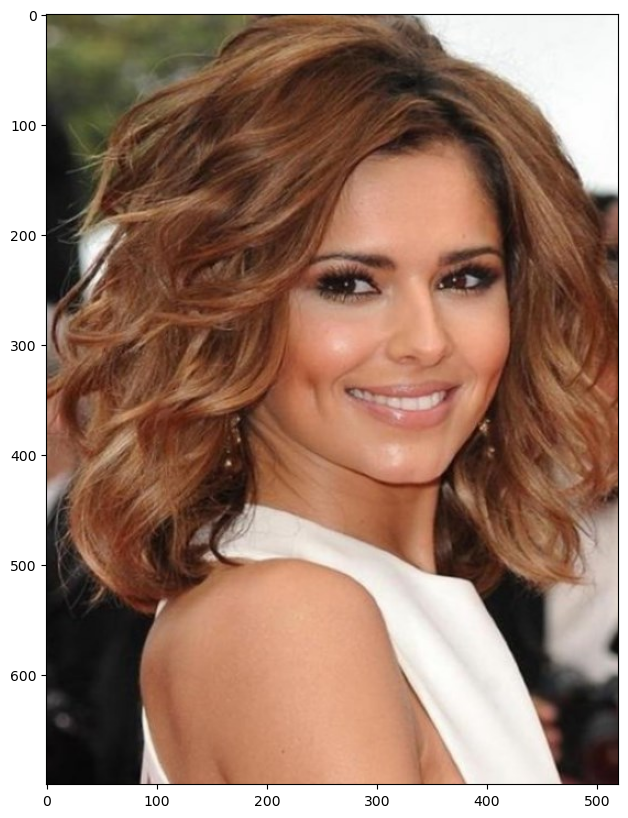

In [3]:
# Load image
img = cv2.imread('orig.jpeg')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)


In [11]:
# Black, dark gray, light gray, white
pallete = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

# Cast the image to float
img =img.astype(np.float32)

In [12]:
def FindColorInPalete(pixel):
    result_color=[]
    result_distance = 100000000000000.0
    for color in pallete:
        distance = np.linalg.norm(pixel - color)
        if distance < result_distance:
            result_distance = distance
            result_color = color
            pass
        continue
    return result_color
        
# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)      

    
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        new_pixel = FindColorInPalete(pixel)
        quantized[r, c, :]  = new_pixel
                
    

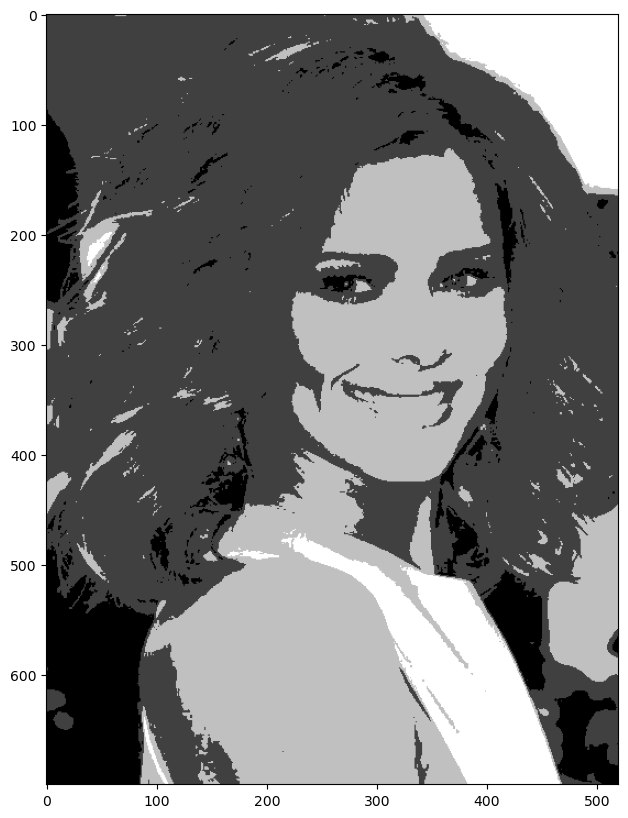

In [13]:
plt.imshow(quantized/255)

In [44]:
avg_quant_error = img - quantized #I am not sure whether it is correct to calculate the quant_error in such way.
#However I used this method in my code blocks below.
red_error = img[:,:,0] - quantized[:,:,0]
green_error = img[:,:,1] - quantized[:,:,1]
blue_error = img[:,:,2] - quantized[:,:,2]


[[  0.   0.   0. ... -29. -32. -33.]
 [  0.   0.   0. ... -29. -32. -32.]
 [  0.   0.   0. ... -29. -31. -31.]
 ...
 [ 53.  53.  56. ...  -5.  -9.  47.]
 [ 59.  57.  59. ...  -9.  51.  42.]
 [ 59.  59.  59. ...  -9.  51.  42.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


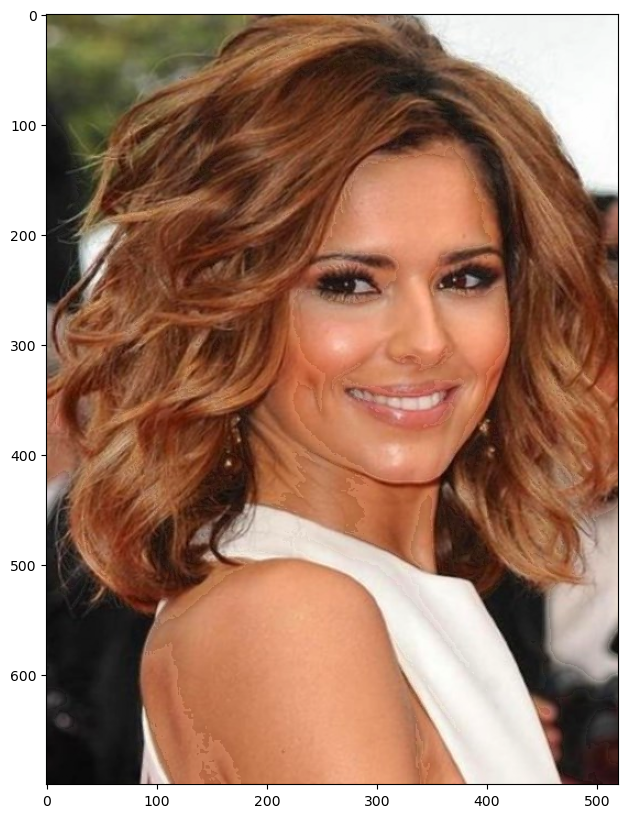

In [15]:
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(rows):
    for c in range(cols):
        red_error = img[r, c, 0] - quantized[r, c, 0]
        green_error = img[r, c, 1] - quantized[r, c, 1]
        blue_error = img[r, c, 2] - quantized[r, c, 2]
        if r < rows - 1:
            red = img[r+1, c][0] + round(red_error * 7/16)
            green = img[r+1, c][1] + round(green_error * 7/16)
            blue = img[r+1, c][2] + round(blue_error * 7/16)
            dithering[r+1, c] = [red, green, blue]
                
                
        if r > 1 and c < cols - 1:
            red   = img[r-1, c+1][0] + round(red_error * 3/16)
            green = img[r-1, c+1][1] + round(green_error * 3/16)
            blue  = img[r-1, c+1][2] + round(blue_error * 3/16)
            dithering[r-1, c+1] = [red, green, blue]

        if c < cols - 1:
            red   = img[r, c+1][0] + round(red_error * 5/16)
            green = img[r, c+1][1] + round(green_error * 5/16)
            blue  = img[r, c+1][2] + round(blue_error * 5/16)
            dithering[r, c+1] = [red, green, blue]

        if r < rows - 1 and c < cols - 1:
            red   = img[r+1, c+1][0] + round(red_error * 1/16)
            green = img[r+1, c+1][1] + round(green_error * 1/16)
            blue  = img[r+1, c+1][2] + round(blue_error * 1/16)
            dithering[r+1, c+1] = [red, green, blue]
            

plt.imshow(dithering/255)      

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fda1592c1f0>)

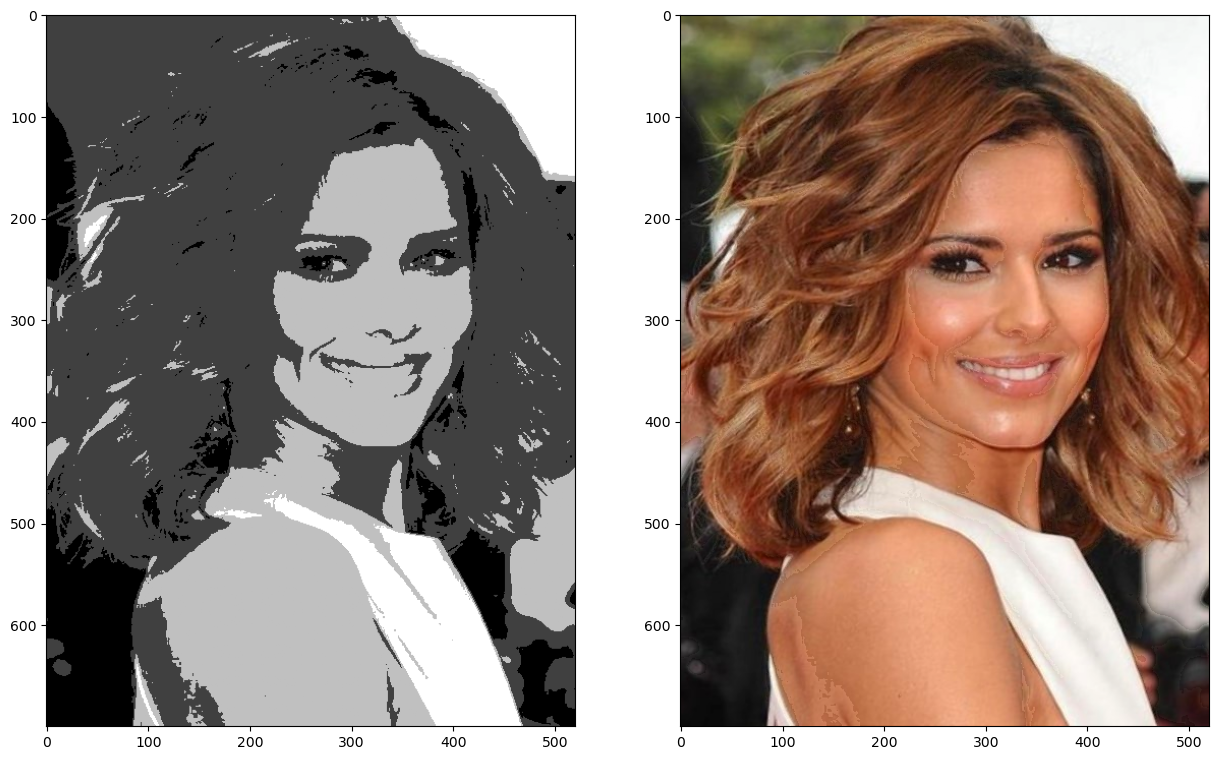

In [16]:

# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized/255)   # optimally quantized
plt.subplot(122), plt.imshow(dithering/255)   # dithering



In [51]:
avg_dith_error = (np.square(img - dithering)).mean()
avg_quant_error = (np.square(img - quantized)).mean()

print(avg_dith_error)
print(avg_quant_error)


63.70782
1777.607


In [ ]:
#Which image has higher quantization error? Optimally quantized or dithered?
#Optimally quantized as the value of the error in the dithered img is spread between the neighbouring pixels, so it has lower value of the error.
#Which image looks better to you?
#The second one. It comprises more colors:)